In [1]:
from lib import *
import sys
import pickle
import os
import random

from matplotlib import pyplot as plt

In [2]:
path='/afs/le.infn.it/user/c/centonze/WQeMS/data/'

# Train

In [3]:
with open(path+'train_data', 'rb') as file:
    data=pickle.load(file)
    
with open(path+'train_y', 'rb') as file:
    y=pickle.load(file)

In [4]:
ragged_data,ragged_y,t_max = reorder_ragged_data(data, y)

879391


In [5]:
t_min=3
t_min,t_max

(3, 51)

In [6]:
yeld_tot=np.array([ragged_data[i].shape[0] for i in np.arange(len(ragged_data))])
yeld_flood=np.array([ragged_y[i].sum() for i in np.arange(len(ragged_data))])
n_tot=sum(yeld_tot)
n_flood=sum(yeld_flood)
print('signal:',n_flood,'total:',n_tot,'signal fraction:',n_flood/n_tot)

signal: 61240.0 total: 879390 signal fraction: 0.0696391817055004


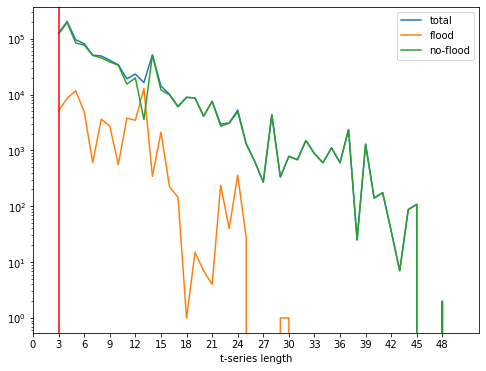

In [7]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0] for i in np.arange(len(ragged_data))],label='total')
plt.plot(np.arange(t_min,t_max),[ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='flood')
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0]-ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='no-flood')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
plt.yscale('log')
plt.xlabel('t-series length')
plt.legend()
plt.show()

## we need to cut the series

In [8]:
np.where(yeld_flood>0)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 26, 27])

In [9]:
count=0
for i in np.where(yeld_flood>0)[0]-np.arange(len(np.where(yeld_flood>0)[0])):
    if i>0:
        break
    count=count+1
print(count)

23


In [10]:
ragged_data,ragged_y,t_max=ragged_data[:count],ragged_y[:count],count+t_min

In [11]:
yeld_tot=np.array([ragged_data[i].shape[0] for i in np.arange(len(ragged_data))])
yeld_flood=np.array([ragged_y[i].sum() for i in np.arange(len(ragged_data))])
n_tot=sum(yeld_tot)
n_flood=sum(yeld_flood)
print('signal:',n_flood,'total:',n_tot,'signal fraction:',n_flood/n_tot)

signal: 61238.0 total: 863415 signal fraction: 0.07092533717852945


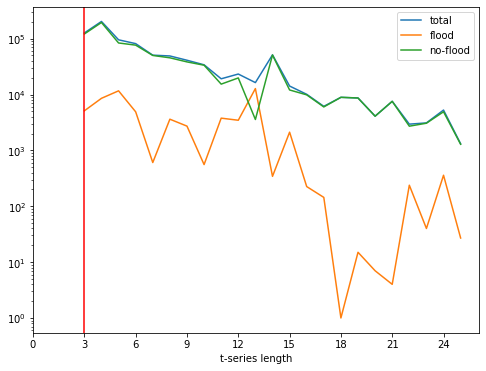

In [12]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0] for i in np.arange(len(ragged_data))],label='total')
plt.plot(np.arange(t_min,t_max),[ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='flood')
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0]-ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='no-flood')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
plt.yscale('log')
plt.xlabel('t-series length')
plt.legend()
plt.show()

## Impose a lower limit of signal fraction for each time-series collection

In [13]:
sig_fraction_inf=0.2

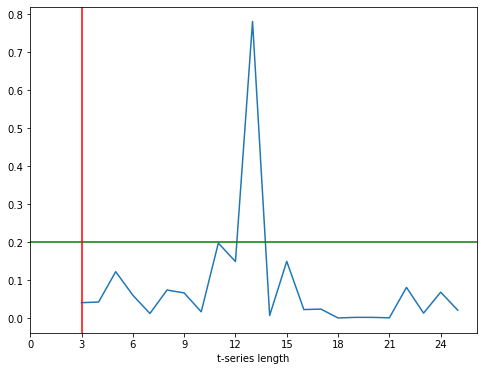

In [14]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),yeld_flood/yeld_tot)
plt.axhline(sig_fraction_inf,color='g')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
#plt.yscale('log')
plt.xlabel('t-series length')
plt.show()

In [15]:
cut_ragged_y=list([])
cut_ragged_data=list([])
for idx in np.arange(count):
    if idx in np.where(yeld_flood/yeld_tot<sig_fraction_inf)[0]:
        sig_idx=np.where(ragged_y[idx]==1)[0]
        #print(sig_idx.shape[0],yeld_flood[idx]) <-- ok
        n_cut=int(yeld_flood[idx]/sig_fraction_inf)
        print(idx,n_cut,sig_idx.shape[0],'total:',n_cut+sig_idx.shape[0])#,'fraction of selected bkg:',n_cut/yeld_tot[idx])
        r_idx=list([])
        
        #for i in np.arange(n_cut):
        #    r=random.randint(0,len(np.where(ragged_y[idx]==0)[0])-1)
        #    r_idx.append(np.where(ragged_y[idx]==0)[0][r])
        
        r_idx=np.where(ragged_y[idx]==0)[0]
        np.random.shuffle(r_idx)
        r_idx=np.array(r_idx)[:n_cut]

        sel_idx=np.union1d(r_idx,sig_idx)
        print(sel_idx.shape[0],sig_idx.shape[0],r_idx.shape[0]+sig_idx.shape[0])
        cut_ragged_y.append(ragged_y[idx][sel_idx])
        cut_ragged_data.append(ragged_data[idx][sel_idx])
    else:
        cut_ragged_y.append(ragged_y[idx])
        cut_ragged_data.append(ragged_data[idx])

0 25540 5108 total: 30648
30648 5108 30648
1 42760 8552 total: 51312
51312 8552 51312
2 58220 11644 total: 69864
69864 11644 69864
3 24510 4902 total: 29412
29412 4902 29412
4 3030 606 total: 3636
3636 606 3636
5 18080 3616 total: 21696
21696 3616 21696
6 13590 2718 total: 16308
16308 2718 16308
7 2785 557 total: 3342
3342 557 3342
8 18880 3776 total: 22656
19124 3776 19124
9 17315 3463 total: 20778
20778 3463 20778
11 1715 343 total: 2058
2058 343 2058
12 10590 2118 total: 12708
12708 2118 12708
13 1125 225 total: 1350
1350 225 1350
14 720 144 total: 864
864 144 864
15 5 1 total: 6
6 1 6
16 75 15 total: 90
90 15 90
17 35 7 total: 42
42 7 42
18 20 4 total: 24
24 4 24
19 1190 238 total: 1428
1428 238 1428
20 200 40 total: 240
240 40 240
21 1795 359 total: 2154
2154 359 2154
22 135 27 total: 162
162 27 162


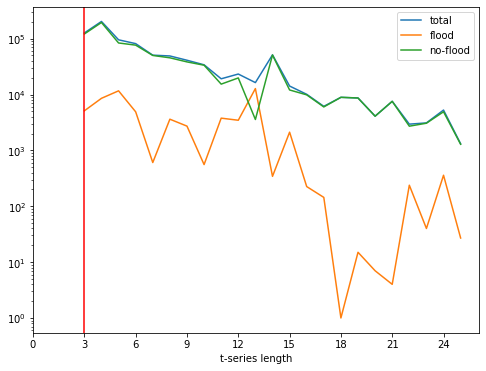

In [16]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0] for i in np.arange(len(ragged_data))],label='total')
plt.plot(np.arange(t_min,t_max),[ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='flood')
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0]-ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='no-flood')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
plt.yscale('log')
plt.xlabel('t-series length')
plt.legend()
plt.show()

In [17]:
cut_yeld_tot=np.array([cut_ragged_data[i].shape[0] for i in np.arange(len(cut_ragged_data))])
cut_yeld_flood=np.array([cut_ragged_y[i].sum() for i in np.arange(len(cut_ragged_data))])
cut_n_tot=sum(cut_yeld_tot)
cut_n_flood=sum(cut_yeld_flood)
print('signal:',cut_n_flood,'total:',cut_n_tot,'signal fraction:',cut_n_flood/cut_n_tot)

signal: 61238.0 total: 303594 signal fraction: 0.20171017872553476


In [18]:
print('saving in',path)
with open(path+'selected_ragged_train_data', "wb") as s_data:   #Pickling
    pickle.dump(cut_ragged_data, s_data)

with open(path+'selected_ragged_train_y', "wb") as s_y:   #Pickling
    pickle.dump(cut_ragged_y, s_y)

saving in /afs/le.infn.it/user/c/centonze/WQeMS/data/


# Test

In [19]:
with open(path+'test_data', 'rb') as file:
    data=pickle.load(file)
    
with open(path+'test_y', 'rb') as file:
    y=pickle.load(file)

In [20]:
ragged_data,ragged_y,t_max = reorder_ragged_data(data, y)

403346


In [23]:
print('saving in',path)
with open(path+'ragged_test_data', "wb") as s_data:   #Pickling
    pickle.dump(ragged_data, s_data)

with open(path+'ragged_test_y', "wb") as s_y:   #Pickling
    pickle.dump(ragged_y, s_y)

saving in /afs/le.infn.it/user/c/centonze/WQeMS/data/


In [24]:
t_min=3
t_min,t_max

(3, 21)

In [25]:
yeld_tot=np.array([ragged_data[i].shape[0] for i in np.arange(len(ragged_data))])
yeld_flood=np.array([ragged_y[i].sum() for i in np.arange(len(ragged_data))])
n_tot=sum(yeld_tot)
n_flood=sum(yeld_flood)
print('signal:',n_flood,'total:',n_tot,'signal fraction:',n_flood/n_tot)

signal: 25574.0 total: 403154 signal fraction: 0.06343481647211735


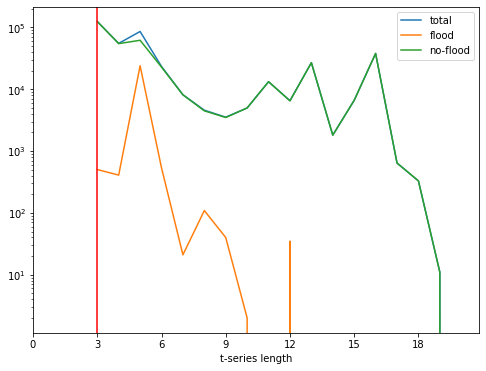

In [27]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0] for i in np.arange(len(ragged_data))],label='total')
plt.plot(np.arange(t_min,t_max),[ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='flood')
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0]-ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='no-flood')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
plt.yscale('log')
plt.xlabel('t-series length')
plt.legend()
plt.show()

# Validation

In [29]:
with open(path+'validation_data', 'rb') as file:
    data=pickle.load(file)
    
with open(path+'validation_y', 'rb') as file:
    y=pickle.load(file)

In [30]:
ragged_data,ragged_y,t_max = reorder_ragged_data(data, y)

299158


In [31]:
print('saving in',path)
with open(path+'ragged_valid_data', "wb") as s_data:   #Pickling
    pickle.dump(ragged_data, s_data)

with open(path+'ragged_valid_y', "wb") as s_y:   #Pickling
    pickle.dump(ragged_y, s_y)

saving in /afs/le.infn.it/user/c/centonze/WQeMS/data/


In [32]:
t_min=3
t_min,t_max

(3, 49)

In [33]:
yeld_tot=np.array([ragged_data[i].shape[0] for i in np.arange(len(ragged_data))])
yeld_flood=np.array([ragged_y[i].sum() for i in np.arange(len(ragged_data))])
n_tot=sum(yeld_tot)
n_flood=sum(yeld_flood)
print('signal:',n_flood,'total:',n_tot,'signal fraction:',n_flood/n_tot)

signal: 1075.0 total: 299157 signal fraction: 0.003593430874089525


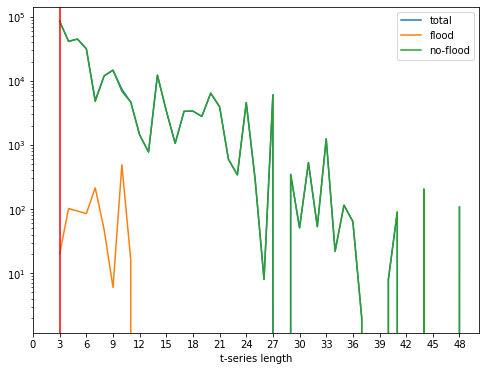

In [34]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0] for i in np.arange(len(ragged_data))],label='total')
plt.plot(np.arange(t_min,t_max),[ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='flood')
plt.plot(np.arange(t_min,t_max),[ragged_data[i].shape[0]-ragged_y[i].sum() for i in np.arange(len(ragged_data))],label='no-flood')
plt.axvline(3,color='r')
plt.xticks(np.arange(0,t_max,3))
plt.yscale('log')
plt.xlabel('t-series length')
plt.legend()
plt.show()